**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [142]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline
import statsmodels
import seaborn as sns 
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [143]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

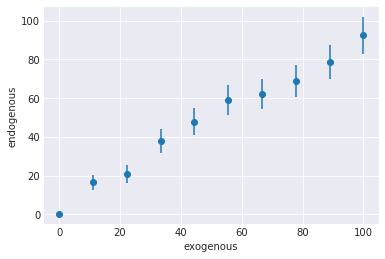

In [144]:
np.random.seed(123)
x = np.linspace(0,100,10)
y = line(1,x,0,errors)
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.errorbar(x, y, yerr=np.sqrt(y), fmt = '.')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [145]:
print(x)

[   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]


In [146]:
print(y)

[  0.          16.47341434  20.94833451  38.02338819  47.77604541
  59.09113157  62.06224705  68.98222917  78.51758296  92.43562791]


In [147]:
x_ = statsmodels.api.add_constant(x)
print(x_)

[[   1.            0.        ]
 [   1.           11.11111111]
 [   1.           22.22222222]
 [   1.           33.33333333]
 [   1.           44.44444444]
 [   1.           55.55555556]
 [   1.           66.66666667]
 [   1.           77.77777778]
 [   1.           88.88888889]
 [   1.          100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [148]:
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ucsl17_python3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1334.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.29e-11
Time:                        22:32:46   Log-Likelihood:                -29.400
No. Observations:                  10   AIC:                             60.80
Df Residuals:                       9   BIC:                             61.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9393      0.026     36.518      0.000       0.881       0.997
==============================================================================
Omnibus:                        2.866   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                0.949
Skew:                           0.023   Prob(JB):                        0.622
Kurtosis:                       1.491   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
smfit_ = smf.OLS(y, x_).fit()
smfit_.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ucsl17_python3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     453.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.48e-08
Time:                        22:32:46   Log-Likelihood:                -27.204
No. Observations:                  10   AIC:                             58.41
Df Residuals:                       8   BIC:                             59.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0720      2.415      2.100      0.069      -0.496      10.640
x1             0.8672      0.041     21.303      0.000       0.773       0.961
==============================================================================
Omnibus:                        2.247   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                0.892
Skew:                           0.163   Prob(JB):                        0.640
Kurtosis:                       1.574   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression with constant fits slightly poorer than the one without.

# 4. plot the data (as points) and both statsmodels fits

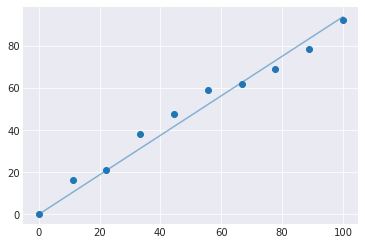

In [150]:
plt.scatter(x, y)
plt.plot(x, smfit.predict(x),alpha=0.5)

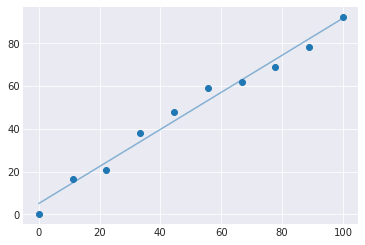

In [151]:
plt.scatter(x, y, label = "plus some noise")
plt.plot(x, smfit_.predict(x_), alpha=0.5)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

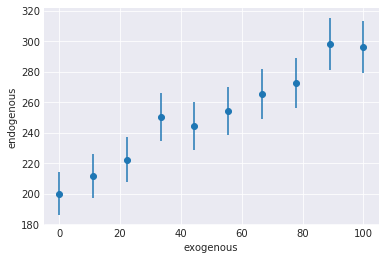

In [152]:
y1 = line(1,x,200,errors)
fig, ax = plt.subplots()
ax.scatter(x,y1)
ax.errorbar(x, y1, yerr=np.sqrt(y1), fmt = '.')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

# 6. repeat step 3

In [153]:
smfit = smf.OLS(y1, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ucsl17_python3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     39.36
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000145
Time:                        22:32:56   Log-Likelihood:                -61.139
No. Observations:                  10   AIC:                             124.3
Df Residuals:                       9   BIC:                             124.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.8568      0.615      6.274      0.000       2.466       5.247
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.677
Skew:                          -0.031   Prob(JB):                        0.713
Kurtosis:                       1.727   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
smfit_ = smf.OLS(y1, x_).fit()
smfit_.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ucsl17_python3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.19e-07
Time:                        22:32:58   Log-Likelihood:                -32.467
No. Observations:                  10   AIC:                             68.93
Df Residuals:                       8   BIC:                             69.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.9941      4.087     49.664      0.000     193.569     212.420
x1             0.9722      0.069     14.109      0.000       0.813       1.131
==============================================================================
Omnibus:                        9.389   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                4.326
Skew:                           1.545   Prob(JB):                        0.115
Kurtosis:                       3.911   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [138]:
smfit = smf.WLS(y1, x_).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ucsl17_python3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            WLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     209.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.09e-07
Time:                        22:27:16   Log-Likelihood:                -32.190
No. Observations:                  10   AIC:                             68.38
Df Residuals:                       8   BIC:                             68.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.0700      3.976     50.573      0.000     191.902     210.238
x1             0.9699      0.067     14.471      0.000       0.815       1.124
==============================================================================
Omnibus:                        1.400   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.928
Skew:                          -0.672   Prob(JB):                        0.629
Kurtosis:                       2.349   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)